In [7]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [8]:
# Load data set
df = pd.read_csv("traffic-data.csv")
df.head()

,Queue_Length,Waiting_Time,Arrival_Rate,Green_Extension
0,6,23.90,2.75,6.13
1,4,4.68,2.34,1.74
2,7,10.01,2.14,4.95
3,4,29.10,12.49,5.17
4,4,18.52,9.17,3.48


In [9]:
# Definisikan variabel fuzzy

# Input
queue_length = ctrl.Antecedent(np.arange(0, 11, 1), 'Queue_Length')
waiting_time = ctrl.Antecedent(np.arange(0, 31, 1), 'Waiting_Time')
arrival_rate = ctrl.Antecedent(np.arange(0, 16, 1), 'Arrival_Rate')

# Output
green_extension = ctrl.Consequent(np.arange(0, 21, 1), 'Green_Extension')
traffic_level = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Traffic_Level')


In [10]:
# Membership functions

queue_length['short'] = fuzz.trimf(queue_length.universe, [0, 0, 4])
queue_length['medium'] = fuzz.trimf(queue_length.universe, [2, 5, 8])
queue_length['long'] = fuzz.trimf(queue_length.universe, [6, 10, 10])

waiting_time['short'] = fuzz.trimf(waiting_time.universe, [0, 0, 10])
waiting_time['medium'] = fuzz.trimf(waiting_time.universe, [5, 15, 25])
waiting_time['long'] = fuzz.trimf(waiting_time.universe, [20, 30, 30])

arrival_rate['low'] = fuzz.trimf(arrival_rate.universe, [0, 0, 5])
arrival_rate['medium'] = fuzz.trimf(arrival_rate.universe, [3, 7, 12])
arrival_rate['high'] = fuzz.trimf(arrival_rate.universe, [10, 15, 15])

green_extension['short'] = fuzz.trimf(green_extension.universe, [0, 0, 7])
green_extension['medium'] = fuzz.trimf(green_extension.universe, [5, 10, 15])
green_extension['long'] = fuzz.trimf(green_extension.universe, [12, 20, 20])

traffic_level['low'] = fuzz.trimf(traffic_level.universe, [0, 0, 0.4])
traffic_level['medium'] = fuzz.trimf(traffic_level.universe, [0.3, 0.5, 0.7])
traffic_level['high'] = fuzz.trimf(traffic_level.universe, [0.6, 1, 1])


In [13]:
# Aturan fuzzy

rule1 = ctrl.Rule(queue_length['short'] & waiting_time['short'] & arrival_rate['low'], traffic_level['low'])
rule2 = ctrl.Rule(queue_length['medium'] | waiting_time['medium'] | arrival_rate['medium'], traffic_level['medium'])
rule3 = ctrl.Rule(queue_length['long'] | waiting_time['long'] | arrival_rate['high'], traffic_level['high'])


In [14]:
# Simulasi fuzzy
traffic_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
traffic_sim = ctrl.ControlSystemSimulation(traffic_ctrl)

traffic_levels = []
for i in range(len(df)):
    traffic_sim.input['Queue_Length'] = df.loc[i, 'Queue_Length']
    traffic_sim.input['Waiting_Time'] = df.loc[i, 'Waiting_Time']
    traffic_sim.input['Arrival_Rate'] = df.loc[i, 'Arrival_Rate']
    traffic_sim.compute()
    traffic_levels.append(traffic_sim.output['Traffic_Level'])

df['Traffic_Level'] = traffic_levels


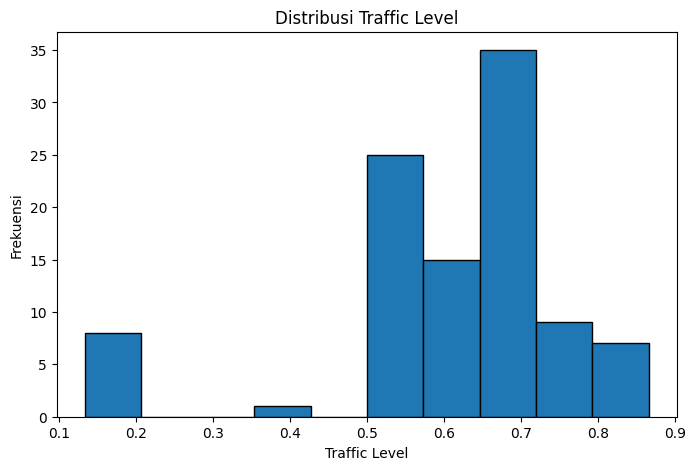

In [15]:
# visualisasi distribusi 
plt.figure(figsize=(8,5))
plt.hist(df['Traffic_Level'], bins=10, edgecolor='black')
plt.title('Distribusi Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Frekuensi')
plt.show()


In [16]:
df.to_csv("traffic_output.csv", index=False)


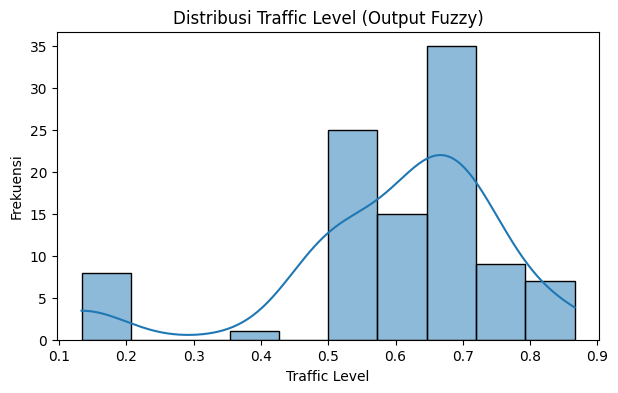

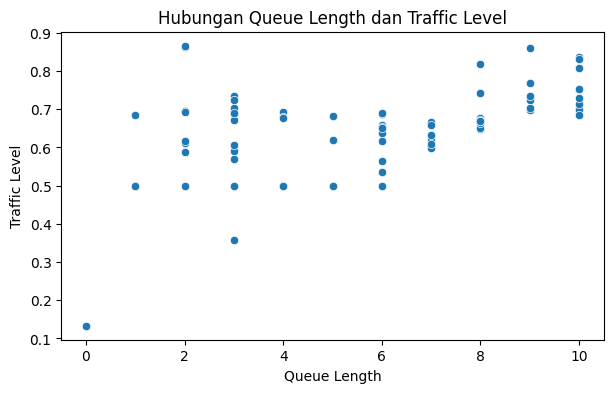

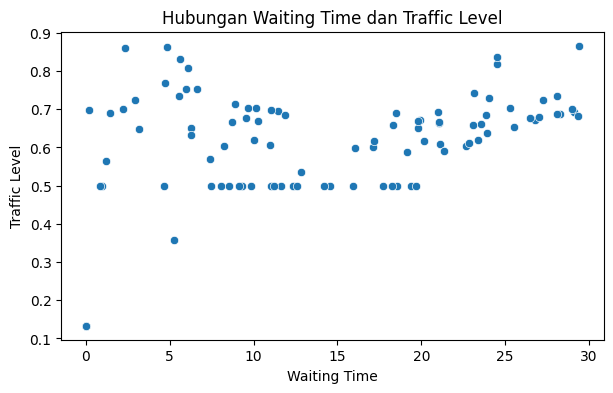

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Baca ulang data hasil simulasi
df_out = pd.read_csv("traffic_output.csv")

# Distribusi Traffic Level (hasil fuzzy)
plt.figure(figsize=(7,4))
sns.histplot(df_out['Traffic_Level'], bins=10, kde=True)
plt.title("Distribusi Traffic Level (Output Fuzzy)")
plt.xlabel("Traffic Level")
plt.ylabel("Frekuensi")
plt.show()

# Hubungan Queue_Length vs Traffic_Level
plt.figure(figsize=(7,4))
sns.scatterplot(x='Queue_Length', y='Traffic_Level', data=df_out)
plt.title("Hubungan Queue Length dan Traffic Level")
plt.xlabel("Queue Length")
plt.ylabel("Traffic Level")
plt.show()

# Hubungan Waiting_Time vs Traffic_Level
plt.figure(figsize=(7,4))
sns.scatterplot(x='Waiting_Time', y='Traffic_Level', data=df_out)
plt.title("Hubungan Waiting Time dan Traffic Level")
plt.xlabel("Waiting Time")
plt.ylabel("Traffic Level")
plt.show()
